# Wideband decoding

## Imports and globals

In [1]:
# External
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('mu2e.mplstyle')

# Internal
import decoder as dc
# Print all classes defined in decoder
print([name for name in dir(dc) if isinstance(getattr(dc, name), type)])

['EWTWriter', 'HitWriter', 'gr', 'header', 'hit', 'reader', 'status', 'subevent', 'tqdm']


In [2]:
!ls /scratch/mu2e/mu2ecrv_crv_scorrodi_v3_03_00/OutputData/wb_test_071.bin -trhl

-rw-r----- 1 mu2ecrv mu2e 5.8G Jan 16 16:13 /scratch/mu2e/mu2ecrv_crv_scorrodi_v3_03_00/OutputData/wb_test_071.bin


## Read and process data

In [3]:
filename = "wb_test_069.bin" # filename
reader = dc.reader(filename) # Initialise reader
reader.raw = False # Set raw flag
hit_writer = dc.HitWriter(n_samples=8) # Initialise hit writer
reader.get(verbose=0, writer=hit_writer) # Read the file
df = hit_writer.get() # retrieve data as df
display(df)

/scratch/mu2e/mu2ecrv_crv_scorrodi_v3_03_00/OutputData/wb_test_069.bin:  99%|████████▉| 80.2M/80.8M [00:27<00:00, 2.95MB/s]


,EWT,channel,time,s0,s1,s2,s3,s4,s5,s6,s7
0,1,64,103,2,1,17,25,17,9,5,6
1,1,65,155,-11,-11,2,9,6,-1,-7,-6
2,1,68,152,-13,-13,3,5,-7,-13,-13,-12
3,1,68,168,-15,-9,5,2,-10,-12,-12,-12
4,1,70,119,4,4,20,23,12,5,6,5
...,...,...,...,...,...,...,...,...,...,...,...
3209240,99999,124,18,-2,-1,13,16,6,-2,-2,-1
3209241,99999,124,215,-2,7,16,9,0,-3,-2,-2
3209242,99999,125,94,-8,-6,9,10,-1,-7,-7,-7
3209243,99999,126,33,5,9,23,18,7,5,6,6


## Filter data

In [4]:
# Filter columns starting with 's' (samples)
columns_to_mask = df.filter(like='s').columns
# Create a mask where all 's' columns are >= threshold
threshold = 10
mask = (df[columns_to_mask] >= threshold).all(axis=1)
# Apply mask
df = df[mask]
# Drop the NaN rows
df = df.dropna()
# Display
display(df)

,EWT,channel,time,s0,s1,s2,s3,s4,s5,s6,s7
27,1,114,114,15,24,35,27,19,17,18,18
45,11,100,157,10,13,25,22,12,10,10,10
85,12,117,113,12,12,26,29,22,16,14,15
86,12,117,147,12,15,29,26,17,13,12,13
91,13,71,150,15,13,26,39,29,18,16,17
...,...,...,...,...,...,...,...,...,...,...,...
3209207,99999,67,2,12,28,28,27,24,19,13,11
3209208,99999,67,175,11,11,24,31,21,14,13,13
3209209,99999,71,106,14,13,30,34,23,17,15,15
3209237,99999,117,43,11,18,28,22,16,15,14,13


## Plot data

Text(0.5, 1.0, 'Samples > 10')

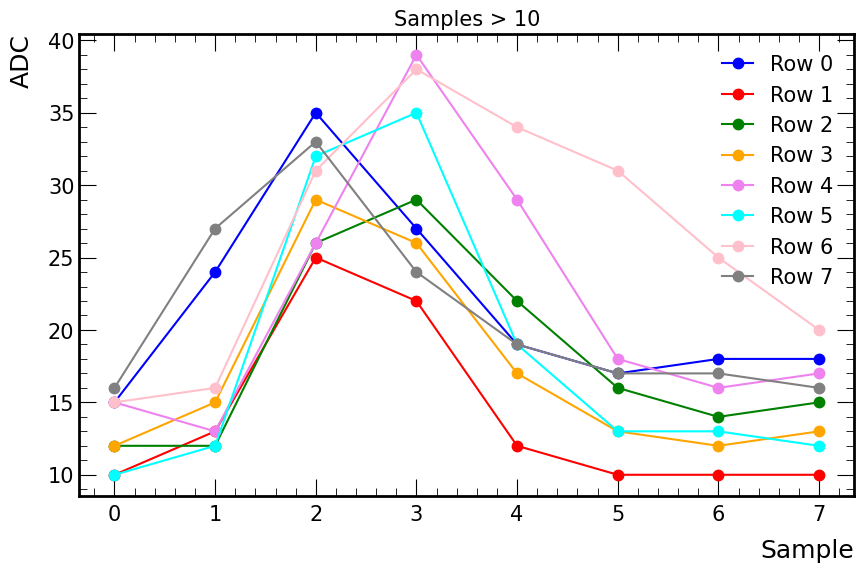

In [5]:
n_samples = 8
row_multiplier = 1
fig, ax = plt.subplots(figsize=(10,6))
for i_sample in range(n_samples):
    # Select 
    # plt.plot(df.iloc[i_sample+5][["s%i" % i for i in range(n_samples)]],'.',ms=15, label=f"{i_sample+5}", linestyle="--")
    plt.plot(
        df.iloc[row_multiplier*i_sample][["s%i" % i for i in range(n_samples)]].values,
        '.',
        ms=15,
        label=f"Row {row_multiplier*i_sample}",
        linestyle="-"
    )
plt.legend(loc="best")
plt.ylabel("ADC")
plt.xlabel("Sample")
plt.title(f"Samples > {threshold}")

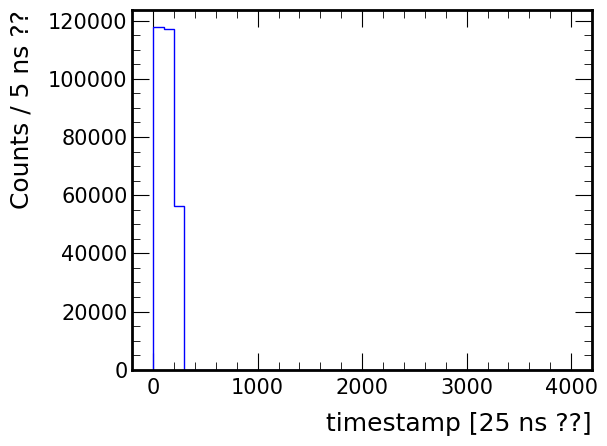

In [6]:
plt.hist(
    df.time.values.astype(np.uint16) & 0xfff, 
    bins=np.arange(0, 0xfff, 100),
    histtype='step'
);
# plt.hist(df.time.values & 0xff);
plt.xlabel("timestamp [25 ns ??]")
plt.ylabel("Counts / 5 ns ??")
plt.tight_layout()

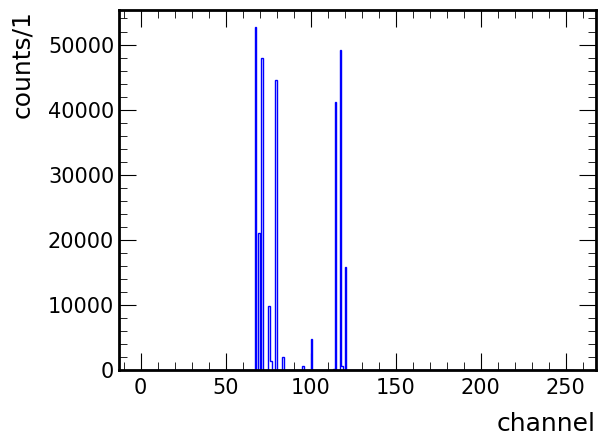

In [7]:
plt.hist(df.channel, bins=np.arange(0,64*4,1), histtype='step');
#plt.hist(df.time.values & 0xff);
plt.xlabel("channel")
plt.ylabel("counts/1")
plt.tight_layout()

(0.0, 192.0)

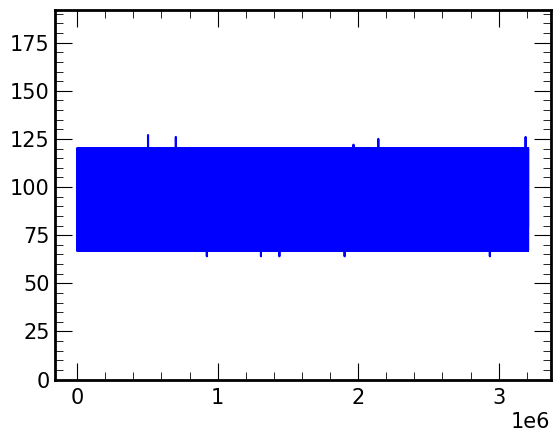

In [8]:
plt.plot(df.channel)
plt.ylim([0,64*3])
plt.ylim([0,64*3])
# plt.scatter(df.channel)

In [9]:
df[df.channel > 1000]

,EWT,channel,time,s0,s1,s2,s3,s4,s5,s6,s7


In [10]:
df.iloc[60-10:60+10]

,EWT,channel,time,s0,s1,s2,s3,s4,s5,s6,s7
510,26,71,127,14,15,29,31,22,15,15,16
535,26,114,59,16,18,31,34,24,18,17,16
537,26,117,121,10,17,30,24,16,15,14,12
548,27,67,98,12,22,32,21,14,14,14,13
550,27,69,85,11,12,29,27,17,11,11,13
553,27,76,127,10,18,47,42,19,11,13,13
576,27,117,133,13,20,33,28,18,14,15,15
583,28,67,35,12,11,24,32,34,30,20,14
584,28,71,75,14,15,25,34,25,16,14,15
585,28,71,148,12,14,30,32,19,14,51,82


99999
1 None


Text(1, 0, 'EWT')

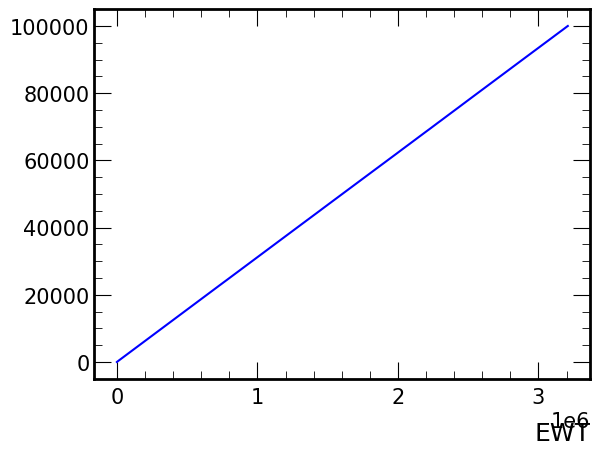

In [11]:
print(df['EWT'].min(), print(df['EWT'].max()))
plt.plot(df['EWT'])
plt.xlabel("EWT")